# ЛР 1
по курсу ММО студентки Писарчук Н. ИУ5-22М

### Задание:
1. Выбрать набор данных (датасет). Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

2. Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
    * История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
    * На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
    * Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
    * История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
3. Сформировать отчет и разместить его в своем репозитории на github.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pd.set_option("display.max_columns", None)

/kaggle/input/uk-road-safety-accidents-and-vehicles/Vehicle_Information.csv
/kaggle/input/uk-road-safety-accidents-and-vehicles/Accident_Information.csv


### Описание датасета:
Данный датасет содержит данные о ДТП в Великобритании. Он содержит информацию о географическом положении, погодных условиях, типе транспортных средств, количестве пострадавших и маневрах транспортных средств, что делает этот набор очень интересным для анализа и исследования.

Датасет состоит из двух файлов:
* Accident_Information.csv: каждая строка в файле представляет собой уникальное дорожно-транспортное происшествие (идентифицируемое столбцом AccidentIndex), с различными свойствами, связанными с аварией, в виде столбцов. Диапазон дат: 2005-2017 гг.
* Vehicle_Information.csv: каждая строка в файле представляет участие уникального транспортного средства в уникальном дорожно-транспортном происшествии, с различными характеристиками транспортных средств и пассажиров в виде столбцов. Диапазон дат: 2004-2016 гг.

Эти файлы могут быть связаны через уникальный идентификатор дорожно-транспортного происшествия (столбец Accident_Index).


In [5]:
accidents = pd.read_csv('/kaggle/input/uk-road-safety-accidents-and-vehicles/Accident_Information.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
accidents.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [7]:
accidents.shape

(2047256, 34)

Датасет содержит белее 2х миллионов строк

In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

Датасет содержит пропуски

In [6]:
accidents.isnull().sum()

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844272
2nd_Road_Number                                 17593
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

Преобразование типа данных колонки date 

In [51]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")
accidents = accidents.dropna(subset=['Time'])

In [52]:
# признак по времени - утро/рабочее время/вечер/ ночь
def feature_time(time):
    if time != 'na' :
        
        hour = time[0:2]


        if int(hour) >= 5 and int(hour) < 10:
            return "утро (5-10)"
        elif int(hour) >= 10 and int(hour) < 18:
            return "рабочее время (10-18)"
        elif int(hour) >= 18 and int(hour) < 23:
            return "вечер (18-23)"
        else:
            return "ночь (23-5)"
        
    return  0

In [53]:
accidents['Daytime'] = accidents['Time'].apply(feature_time)
accidents[['Time', 'Daytime']].head(8)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Time,Daytime
0,17:42,рабочее время (10-18)
1,17:36,рабочее время (10-18)
2,00:15,ночь (23-5)
3,10:35,рабочее время (10-18)
4,21:13,вечер (18-23)
5,12:40,рабочее время (10-18)
6,20:40,вечер (18-23)
7,17:35,рабочее время (10-18)


**Увеличивается или уменьшается количество ДТП за последние годы?**

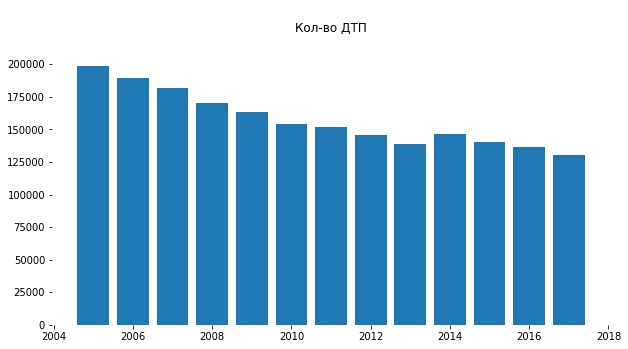

In [57]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

yearly_count = accidents['Date'].dt.year.value_counts().sort_index(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(yearly_count.index, yearly_count.values)
ax.set_title('\nКол-во ДТП\n')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

Как можно видеть из графика кол-во ДТП с каждым годом. Это может быть обусловлено ужесточением санкций со стороны государства против нарушителей ПДД, с другой стороны - более ответственным отношением водителей к вождению, обновлением автомобильного парка в стране, улучшением дорожного покрытия/освещения/заграждений

**Зависит ли кол-во ДТП от дня недели?**


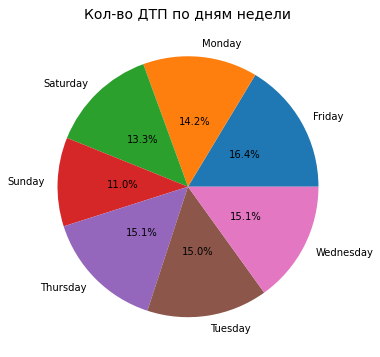

In [63]:
pieData = accidents.groupby("Day_of_Week")["Year"].count()

pie, ax = plt.subplots(figsize=[10,6])
labels = pieData.keys()
plt.pie(x=pieData, autopct="%.1f%%", explode=None, labels=labels, pctdistance=0.5)
plt.title("Кол-во ДТП по дням недели", fontsize=14);


Самое большое количество ДТП случается в пятницу. Можно предположить, что это связано с увеличением траффика на дорогах - так как многие на выходные стремятся выехать за город, усталостью после рабочей недели


[Text(0.5, 0, '\nОбщее кол-во ДТП'), Text(0, 0.5, '')]

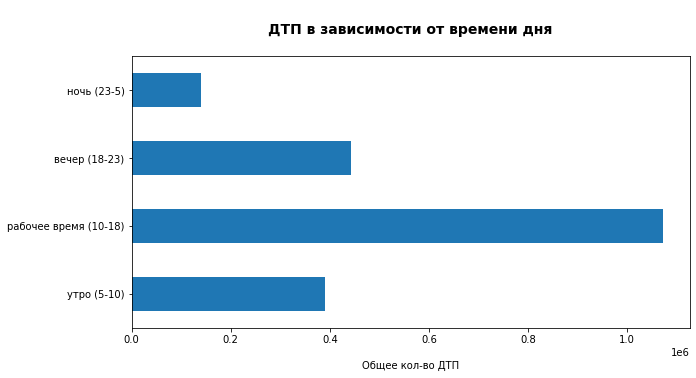

In [65]:
order = ["утро (5-10)", "рабочее время (10-18)", "вечер (18-23)", "ночь (23-5)"]
df_sub = accidents.groupby('Daytime').size().reindex(order)

fig, ax = plt.subplots(figsize=(10, 5))

df_sub.plot(kind='barh', ax=ax)
ax.set_title('\nДТП в зависимости от времени дня\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nОбщее кол-во ДТП', ylabel='')


Самое большое количество ДТП случается в начале и в конце рабочего дня.  

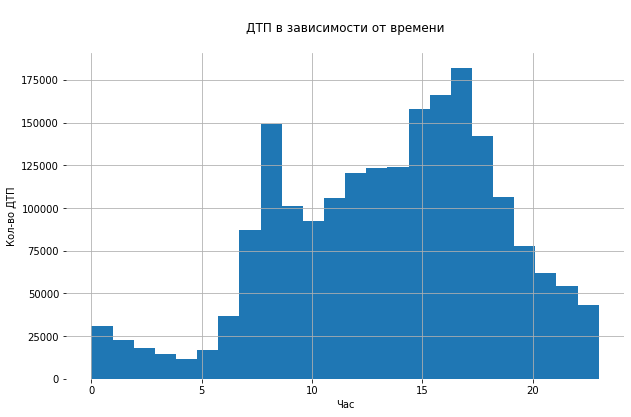

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
accidents.Time.str[0:2].astype('int').hist(bins=24, ax=ax)
ax.set_title('\nДТП в зависимости от времени\n')
ax.set(xlabel='Час', ylabel='Кол-во ДТП')

sns.despine(top=True, right=True, left=True, bottom=True);

Корреляция между числовыми признаками

<AxesSubplot:>

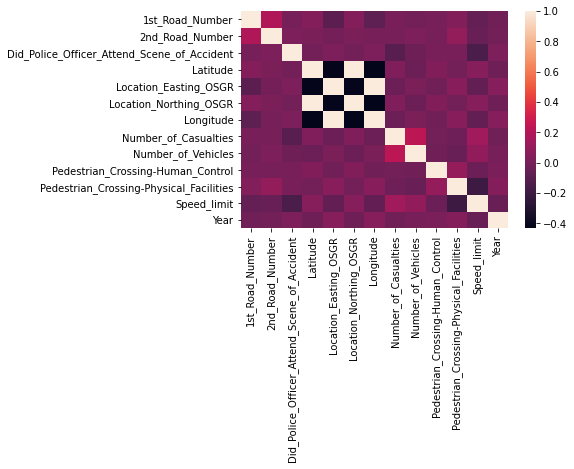

In [73]:
sns.heatmap(accidents.corr())

* Ограничение скорости отрицательно коррелирует с флагом приезда полиции и наличием пешеходного перехода
* Количество пострадавших связано с количеством ТС

Связь количества пострадавших с количеством ТС

<AxesSubplot:xlabel='Number_of_Vehicles', ylabel='Number_of_Casualties'>

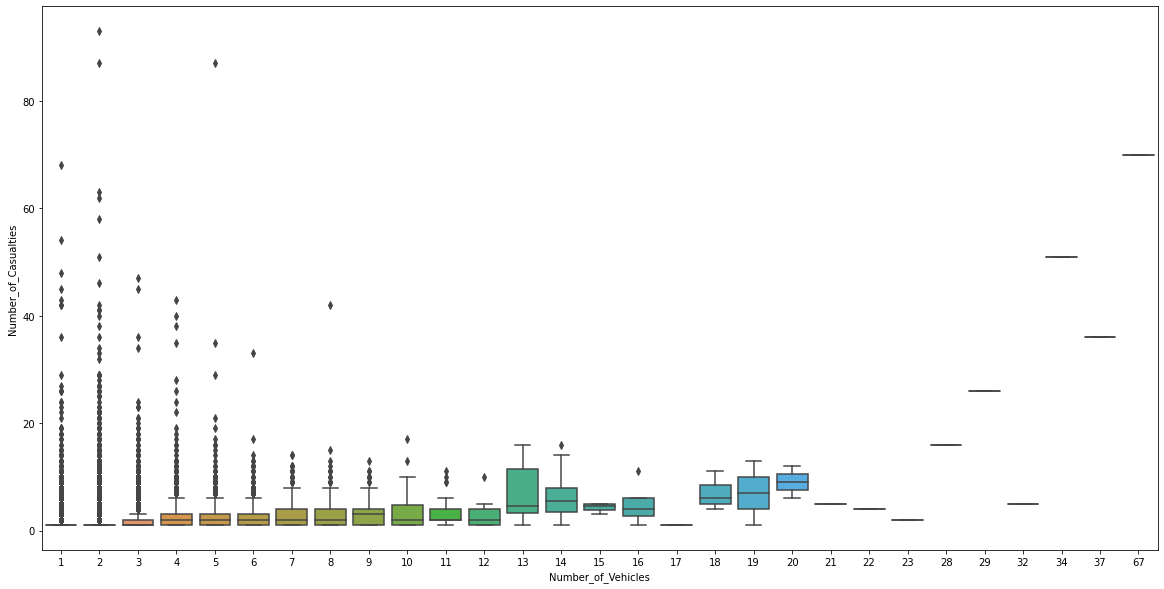

In [76]:
plt.subplots(figsize=(20, 10))

sns.boxplot(x=accidents.Number_of_Vehicles, y=accidents.Number_of_Casualties)

* Возможно, большое количество пострадавших при количестве ТС 1-2 связано с тем, что в ДТП участвовали маршрутные ТС: вместимость маршрутного такси - 20 человек, автобуса -50
* Чем больше ТС в ДТП - тем больше жертв
* Правую часть нельзя относить к выбросам в данных, потому что, например, зимой случаются массовые ДТП при обледенении дороги